In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = "datasets/delhi_processed.csv"
data = pd.read_csv(dataset)
df_comp=pd.DataFrame(data)
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,17.0,20,34,294,4,621.0,6.3808,4.46656
1,2016-01-01 01:00:00,17.0,20,34,302,4,621.0,6.3796,4.46572
2,2016-01-01 02:00:00,17.0,20,34,309,4,621.0,6.3772,4.46404
3,2016-01-01 03:00:00,17.0,20,33,317,4,621.0,2.1738,1.52166
4,2016-01-01 04:00:00,17.0,20,32,212,6,621.0,1.9650,1.37550


In [3]:
df_comp['EnergyGenerated']=df_comp.EnergyGenerated
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,17.0,20,34,294,4,621.0,6.3808,4.46656
1,2016-01-01 01:00:00,17.0,20,34,302,4,621.0,6.3796,4.46572
2,2016-01-01 02:00:00,17.0,20,34,309,4,621.0,6.3772,4.46404
3,2016-01-01 03:00:00,17.0,20,33,317,4,621.0,2.1738,1.52166
4,2016-01-01 04:00:00,17.0,20,32,212,6,621.0,1.9650,1.37550


In [4]:
df_comp['date_time'] = pd.to_datetime(df_comp['date_time'])
df_comp2 = df_comp.groupby(df_comp['date_time'].dt.date).agg({ 'EnergyGenerated': 'sum'}).reset_index()
df_comp2.describe()

,EnergyGenerated
count,1462.000000
mean,301.636117
std,202.909606
min,4.814460
25%,171.122228
50%,260.156925
75%,380.072332
max,2407.688465


C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_15836\1877663863.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[threshold1 <= z_scores]


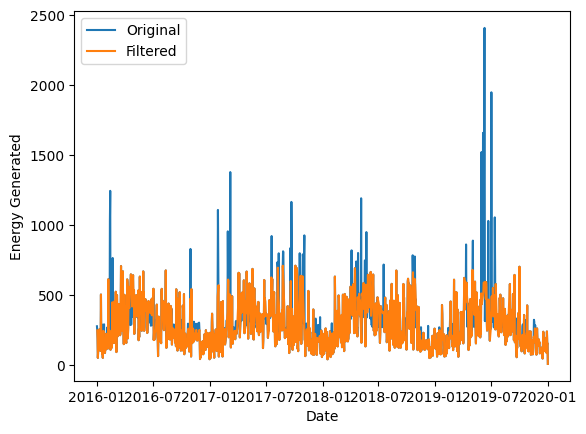

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_comp2['date_time'], df_comp2['EnergyGenerated'], label='Original')

z_scores = np.abs((df_comp2['EnergyGenerated'] - df_comp2['EnergyGenerated'].mean()) / df_comp2['EnergyGenerated'].std())
threshold1 = 0.2
threshold2 = 2
df_filtered = df_comp2[z_scores <= threshold2]
df_filtered = df_filtered[threshold1 <= z_scores]

df_filtered['EnergyGenerated'] = df_filtered['EnergyGenerated'].fillna((df_filtered['EnergyGenerated'].shift(1) + df_filtered['EnergyGenerated'].shift(-1) + df_filtered['EnergyGenerated'].shift(-2) + df_filtered['EnergyGenerated'].shift(2)) / 4)


plt.plot(df_filtered['date_time'], df_filtered['EnergyGenerated'], label='Filtered')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.legend()


plt.show()


In [6]:
df_filtered['Temperature'] = df_comp['Temperature']
df_filtered['pressure'] = df_comp['Pressure']
df_filtered['humidity'] = df_comp['Humidity']
df_filtered['WindDirection(Degrees)'] = df_comp['WindDirection(Degrees)']
df_filtered['Speed'] = df_comp['Speed']
df_filtered['SunLightDuration'] = df_comp['SunLightDuration']
df_filtered['SolarRadiation'] = df_comp['SolarRadiation']

In [7]:
df_filtered.describe()

,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,274.193383,17.492647,16.128028,43.865917,222.480104,8.006055,651.626298,14.073130
std,156.772772,3.007521,2.522805,16.925102,108.285515,3.811007,22.520997,21.110585
min,4.814460,12.000000,9.000000,11.000000,0.000000,1.000000,621.000000,1.234500
25%,153.645450,15.000000,15.000000,31.000000,120.750000,5.000000,631.000000,2.247200
50%,224.578550,17.000000,16.000000,41.000000,280.000000,8.000000,649.000000,8.073200
75%,394.531620,20.000000,18.000000,53.000000,311.000000,10.000000,671.000000,15.763325
max,707.311010,24.500000,23.000000,99.000000,358.000000,26.000000,695.000000,158.281800


In [8]:
df_filtered.isnull().sum()

date_time                 0
EnergyGenerated           0
Temperature               0
pressure                  0
humidity                  0
WindDirection(Degrees)    0
Speed                     0
SunLightDuration          0
SolarRadiation            0
dtype: int64

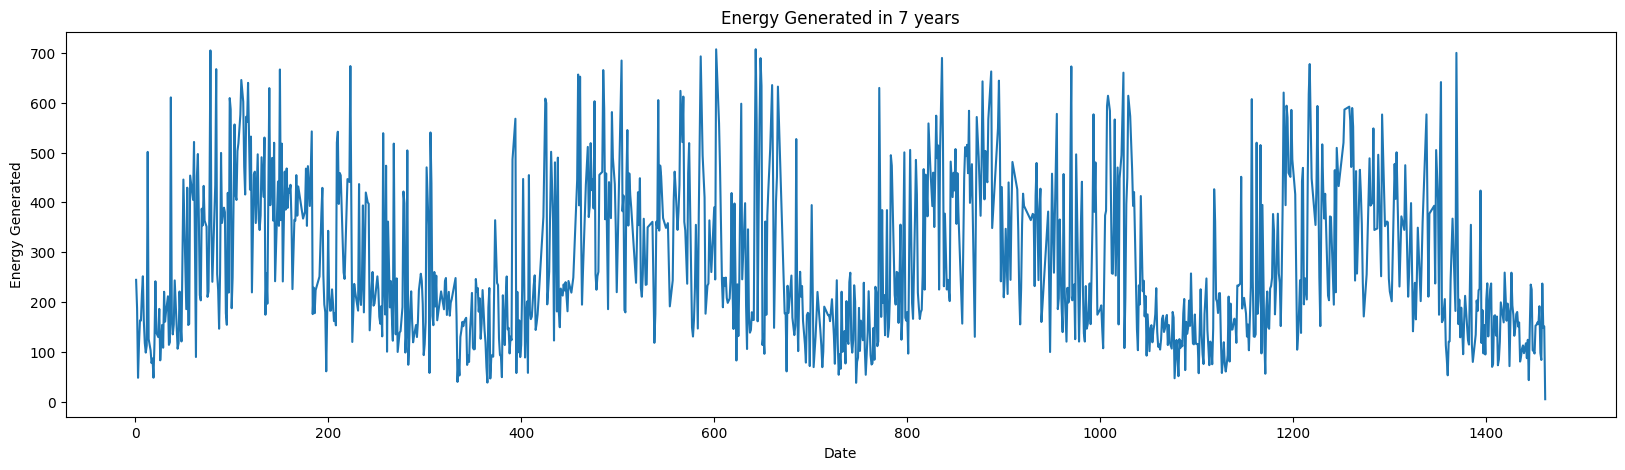

In [9]:
# Set the 'date' column as the index
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])


fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_filtered['EnergyGenerated'].index, df_filtered['EnergyGenerated'])

ax.set_xlabel('Date')
ax.set_ylabel('Energy Generated')
ax.set_title('Energy Generated in 7 years')
plt.show()

In [10]:
import pandas as pd

# Extract month and day of the year from the 'datetime' column
df_filtered['month'] = df_filtered['date_time'].dt.month
df_filtered['day_of_year'] = df_filtered['date_time'].dt.dayofyear

summer_condition = ((df_filtered['month'] >= 6) & (df_filtered['month'] <= 8))
winter_condition = ((df_filtered['month'] >= 12) | (df_filtered['month'] <= 2))
rainy_condition = ((df_filtered['month'] >= 3) & (df_filtered['month'] <= 5))

# Create the 'isSummer', 'isWinter', and 'isRainy' columns
df_filtered['isSummer'] = summer_condition.astype(int)
df_filtered['isWinter'] = winter_condition.astype(int)
df_filtered['isRainy'] = rainy_condition.astype(int)


In [11]:
size = int(len(df_filtered)*0.8)
df_train, df_test = df_filtered.iloc[:size], df_filtered.iloc[size:]
df_test.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1157,2019-03-03,607.10860,21.5,17,32,343,8,675.0,2.0942,3,62,0,0,1
1158,2019-03-04,243.71368,21.5,17,31,343,9,675.0,2.3607,3,63,0,0,1
1159,2019-03-05,130.78975,21.5,18,30,331,9,675.0,2.3607,3,64,0,0,1
1160,2019-03-06,129.97341,21.5,18,30,318,10,675.0,11.2564,3,65,0,0,1
1161,2019-03-07,135.13927,21.5,19,30,306,10,675.0,15.4603,3,66,0,0,1


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered['EnergyGenerated'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.697063262608693
p-value: 8.522827031138977e-05
Critical Values: {'1%': -3.4360690296267338, '5%': -2.864065327292836, '10%': -2.568114547237679}


In [14]:
df_filtered.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1,2016-01-02,244.40199,17.0,20,34,302,4,621.0,6.3796,1,2,0,1,0
2,2016-01-03,187.46665,17.0,20,34,309,4,621.0,6.3772,1,3,0,1,0
3,2016-01-04,47.84675,17.0,20,33,317,4,621.0,2.1738,1,4,0,1,0
4,2016-01-05,116.94907,17.0,20,32,212,6,621.0,1.9650,1,5,0,1,0
5,2016-01-06,163.03651,17.0,21,31,107,7,621.0,7.0284,1,6,0,1,0


## Using ARIMA model

In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df_filtered["EnergyGenerated"],trace=True,suppress_warnings=True)
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14970.277, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14610.323, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14723.099, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16588.500, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14579.460, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=14552.934, Time=0.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=14530.234, Time=0.29 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=14516.261, Time=0.34 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=14479.248, Time=2.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=14484.859, Time=1.68 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=14479.318, Time=1.05 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] 

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(df_train["EnergyGenerated"],order=(2,1,1))
model_Arima = model_Arima.fit()
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        EnergyGenerated   No. Observations:                  924
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5777.738
Date:                Thu, 29 Jun 2023   AIC                          11563.476
Time:                        13:31:23   BIC                          11582.786
Sample:                             0   HQIC                         11570.843
                                - 924                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2201      0.033      6.572      0.000       0.154       0.286
ar.L2         -0.0487      0.034     -1.415      0.157      -0.116       0.019
ma.L1         -0.8956      0.019    -48.368      0.000      -0.932      -0.859
sigma2        1.6e+04    641.121     24.953      0.000    1.47e+04    1.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                84.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.62
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start = len(df_train)
end =len(df_train)+len(df_test)-1
pred_arima = model_Arima.predict(start=start,end=end,type='levels')
pred_arima.index = df_filtered.index[start:end+1]
print(pred_arima)

1157    198.294585
1158    184.821867
1159    183.457723
1160    183.813345
1161    183.958016
           ...    
1457    183.967050
1458    183.967050
1459    183.967050
1460    183.967050
1461    183.967050
Name: predicted_mean, Length: 232, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(pred_arima,df_test["EnergyGenerated"]))/10
print(rmse_arima)


17.859299072884934



## Using Arima with Features

In [19]:
# Define the exogenous variables
exog_vars = ['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Arima2 = ARIMA(df_train['EnergyGenerated'], order=(5, 0, 1), exog=df_train[exog_vars])
model_fit = model_Arima2.fit()

pred_arima2 = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_arima2.index = df_filtered.index[start:end+1]

In [20]:
# Evaluate the forecast
rmse_arima2 = sqrt(mean_squared_error(pred_arima2,df_test["EnergyGenerated"]))/10

print("rmse_arima2:", rmse_arima2)
print("Forecasted energy generation:", pred_arima2)


rmse_arima2: 14.034143530079017
Forecasted energy generation: 1157    338.243808
1158    364.021230
1159    363.194188
1160    357.530525
1161    349.839261
           ...    
1457    198.267705
1458    192.717311
1459    197.620848
1460    208.041423
1461    213.040454
Name: predicted_mean, Length: 232, dtype: float64


## Using AutoRegression Model

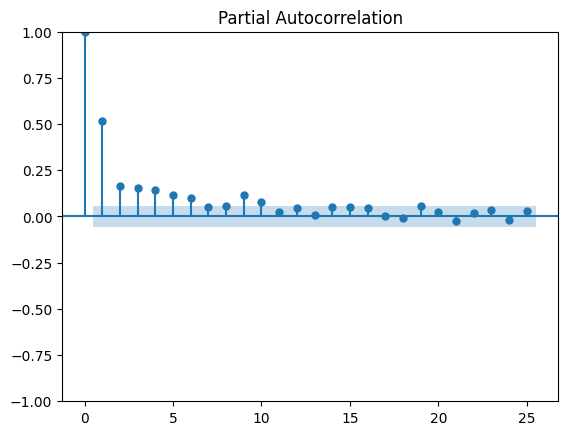

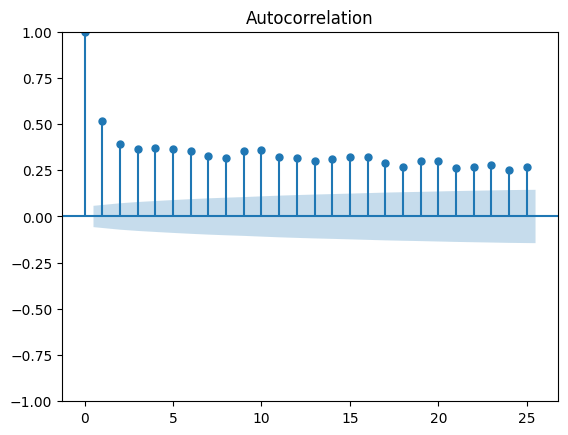

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df_filtered['EnergyGenerated'],lags=25) 
acf = plot_acf(df_filtered['EnergyGenerated'],lags=25)

In [22]:
from statsmodels.tsa.ar_model import AutoReg
model_AutoReg = AutoReg(df_train['EnergyGenerated'],lags=20).fit()
print(model_AutoReg.summary())

                            AutoReg Model Results                             
Dep. Variable:        EnergyGenerated   No. Observations:                  924
Model:                    AutoReg(20)   Log Likelihood               -5650.559
Method:               Conditional MLE   S.D. of innovations            125.421
Date:                Thu, 29 Jun 2023   AIC                          11345.118
Time:                        13:31:27   BIC                          11450.868
Sample:                            20   HQIC                         11385.507
                                  924                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  36.3529     12.407      2.930      0.003      12.036      60.670
EnergyGenerated.L1      0.3159      0.033      9.501      0.000       0.251       0.381
EnergyGenerated.

In [23]:
pred_autoreg = model_AutoReg.predict(start=start,end=end,dynamic = False)
pred_autoreg.index = df_filtered.index[start:end+1]
print(pred_autoreg)

1157    224.400439
1158    224.190476
1159    210.781598
1160    216.465443
1161    209.266713
           ...    
1457    278.921153
1458    278.930589
1459    278.939812
1460    278.948825
1461    278.957634
Length: 232, dtype: float64


In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(df_test['EnergyGenerated'],pred_autoreg))/10
print(rmse_autoreg)


16.094869430159527


## Using SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_vars =['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Sarima = SARIMAX(df_train['EnergyGenerated'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12), exog=df_train[exog_vars])
model_fit = model_Sarima.fit()

In [26]:
# Forecast future energy generation
pred_sarima = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_sarima.index = df_filtered.index[start:end+1]

rmse_sarima = sqrt(mean_squared_error(pred_sarima,df_test["EnergyGenerated"]))/10


print("rmse_arima2:", rmse_sarima)

print("Forecasted energy generation:", pred_sarima)


rmse_arima2: 18.804060868114053
Forecasted energy generation: 1157    238.407846
1158    233.110364
1159    223.012854
1160    222.401305
1161    214.260633
           ...    
1457    148.174410
1458    141.898419
1459    145.674541
1460    156.534120
1461    158.865051
Name: predicted_mean, Length: 232, dtype: float64


## Using Prophet Model

In [27]:

from prophet.plot import plot_plotly, plot_components_plotly
import prophet as pt


In [28]:
df_prophet = pd.DataFrame()
df_prophet ["ds"] = data["date_time"]
df_prophet["y"] = data["EnergyGenerated"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet = df_prophet.groupby(df_prophet['ds'].dt.date).agg({ 'y': 'sum'}).reset_index()

df_prophet.head()

,ds,y
0,2016-01-01,274.10124
1,2016-01-02,244.40199
2,2016-01-03,187.46665
3,2016-01-04,47.84675
4,2016-01-05,116.94907


In [29]:
# Filter out the outliers
z_scores = np.abs((df_prophet['y'] - df_prophet['y'].mean()) / df_prophet['y'].std())

threshold1 = 0.2
threshold2 = 2

df_prophet_filtered = df_prophet[z_scores <= threshold2]
df_prophet_filtered = df_prophet_filtered[threshold1 <= z_scores]


df_prophet_filtered['y'] = df_prophet_filtered['y'].fillna((df_prophet_filtered['y'].shift(1) + df_prophet_filtered['y'].shift(-1) + df_prophet_filtered['y'].shift(-2) + df_prophet_filtered['y'].shift(2)) / 4)


In [30]:
size = int(len(df_prophet_filtered)*0.8)

df_prophet_train = df_prophet_filtered.iloc[:size]
df_prophet_test = df_prophet_filtered.iloc[size:]

In [31]:
model_prophet = pt.Prophet()
model_prophet.fit(df_prophet_train)
future = model_prophet.make_future_dataframe(periods=415) 
forecast = model_prophet.predict(future) 

13:31:33 - cmdstanpy - INFO - Chain [1] start processing
13:31:33 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1334,2020-04-16,289.082156,296.724010,631.354256,288.901254,289.267027,174.960872,174.960872,174.960872,17.104089,17.104089,17.104089,157.856783,157.856783,157.856783,0.0,0.0,0.0,464.043027
1335,2020-04-17,289.084261,272.470057,601.940773,288.902920,289.270164,157.230589,157.230589,157.230589,-2.258710,-2.258710,-2.258710,159.489299,159.489299,159.489299,0.0,0.0,0.0,446.314850
1336,2020-04-18,289.086367,289.333556,598.144709,288.904587,289.273294,153.752670,153.752670,153.752670,-6.674211,-6.674211,-6.674211,160.426882,160.426882,160.426882,0.0,0.0,0.0,442.839037
1337,2020-04-19,289.088473,288.854865,604.821153,288.906283,289.276423,158.709602,158.709602,158.709602,-1.987012,-1.987012,-1.987012,160.696614,160.696614,160.696614,0.0,0.0,0.0,447.798075
1338,2020-04-20,289.090578,278.102251,596.075369,288.907543,289.279552,145.491479,145.491479,145.491479,-14.845620,-14.845620,-14.845620,160.337099,160.337099,160.337099,0.0,0.0,0.0,434.582057


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1334,2020-04-16,464.043027,296.724010,631.354256
1335,2020-04-17,446.314850,272.470057,601.940773
1336,2020-04-18,442.839037,289.333556,598.144709
1337,2020-04-19,447.798075,288.854865,604.821153
1338,2020-04-20,434.582057,278.102251,596.075369


In [34]:
df_prophet_test.tail()

,ds,y
1457,2019-12-28,83.63054
1458,2019-12-29,236.96344
1459,2019-12-30,148.13197
1460,2019-12-31,150.97719
1461,2020-01-01,4.81446


In [35]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-232:]['yhat']

rmse_prophet = rmse(predictions,df_prophet_test['y'])/10

print(rmse_prophet)

19.918354605742103


In [36]:
print("Root Mean Square error for Auto Regression :",rmse_autoreg)
print("Root Mean Square error for ARIMA :",rmse_arima)
print("Root Mean Square error for SARIMA :",rmse_sarima)
print("Root Mean Square error for ARIMA with features :",rmse_arima2)
print("Root Mean Square error for Prophet :",rmse_prophet)

Root Mean Square error for Auto Regression : 16.094869430159527
Root Mean Square error for ARIMA : 17.859299072884934
Root Mean Square error for SARIMA : 18.804060868114053
Root Mean Square error for ARIMA with features : 14.034143530079017
Root Mean Square error for Prophet : 19.918354605742103
